In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def country_performance_WC2014(country):
    # Import Worldcup 2014 data
    worldcup14_df = pd.read_csv('data/international-fifa-world-cup-2014-brazil-teams-2014-to-2014-stats.csv')

    # Filter Worldcup 2014 data
    worldcup14_filter_df= worldcup14_df[['country','win_percentage','draw_percentage_overall','loss_percentage_ovearll']]

    # Filter the DataFrame for the specific country
    country_data = worldcup14_filter_df[worldcup14_filter_df['country'] == country]

    if country_data.empty:
        print(f"No data available for {country}")
        return

    # Extract percentages
    percentages = country_data[['win_percentage', 'loss_percentage_ovearll', 'draw_percentage_overall']].values.flatten()

    # Define labels for the bars
    labels = ['Win', 'Lose', 'Draw']

    # Create the bar plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, percentages, color=['green', 'red', 'blue'])

    # Add title and labels
    plt.title(f'World cup 2014 performance of {country}')
    plt.ylabel('Percentage')
    plt.xlabel('Outcome')

    # Show the plot
    plt.show()

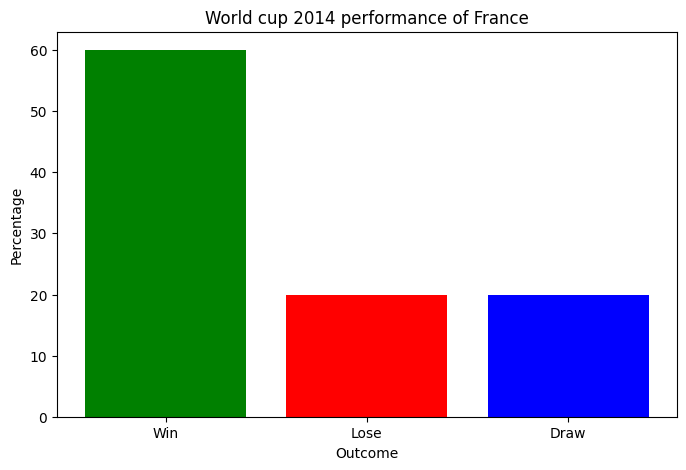

In [6]:
country_performance_WC2014('France')

In [8]:
def plot_goals_scored(team1, team2):
    # Loding Euro Dataset
    euro_df = pd.read_csv('data/Uefa Euro Cup All Matches.csv')

    # Function to clean Eruo Dataset
    def clean_euro_df(df):
        # Clearing string for Home and Away team
        df['HomeTeamName'] = df['HomeTeamName'].str.strip()
        df['AwayTeamName'] = df['AwayTeamName'].str.strip()
        df['SpecialWinConditions'] = df['SpecialWinConditions'].str.strip()

        # Filling NULL value with NA
        df['SpecialWinConditions'].fillna('NA',inplace=True)

    clean_euro_df(euro_df)

    """
    Plots the goals scored by two teams in their respective matches.

    Parameters:
    team1 (str): The name of the first team.
    team2 (str): The name of the second team.
    matches (pd.DataFrame): DataFrame containing match data with columns 'HomeTeamName', 'AwayTeamName', 'Date', 'HomeTeamGoals', and 'AwayTeamGoals'.
    """

    plt.figure(figsize=(10, 4))

    # Goals scored by Team1
    team1_matches = euro_df[(euro_df['HomeTeamName'] == team1) | (euro_df['AwayTeamName'] == team1)]
    home_team1 = team1_matches[team1_matches['HomeTeamName'] == team1]
    away_team1 = team1_matches[team1_matches['AwayTeamName'] == team1]

    plt.bar(home_team1['Date'], home_team1['HomeTeamGoals'], label=f'{team1} Goals at Home', color='blue')
    plt.bar(away_team1['Date'], away_team1['AwayTeamGoals'], label=f'{team1} Goals Away', color='lightblue')

    # Goals scored by Team2
    team2_matches = euro_df[(euro_df['HomeTeamName'] == team2) | (euro_df['AwayTeamName'] == team2)]
    home_team2 = team2_matches[team2_matches['HomeTeamName'] == team2]
    away_team2 = team2_matches[team2_matches['AwayTeamName'] == team2]

    plt.bar(home_team2['Date'], home_team2['HomeTeamGoals'], label=f'{team2} Goals at Home', color='red')
    plt.bar(away_team2['Date'], away_team2['AwayTeamGoals'], label=f'{team2} Goals Away', color='pink')

    # Plot customization
    plt.xlabel('Match Date')
    plt.ylabel('Goals Scored')
    plt.title(f'Goals Scored by {team1} and {team2} in Matches')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


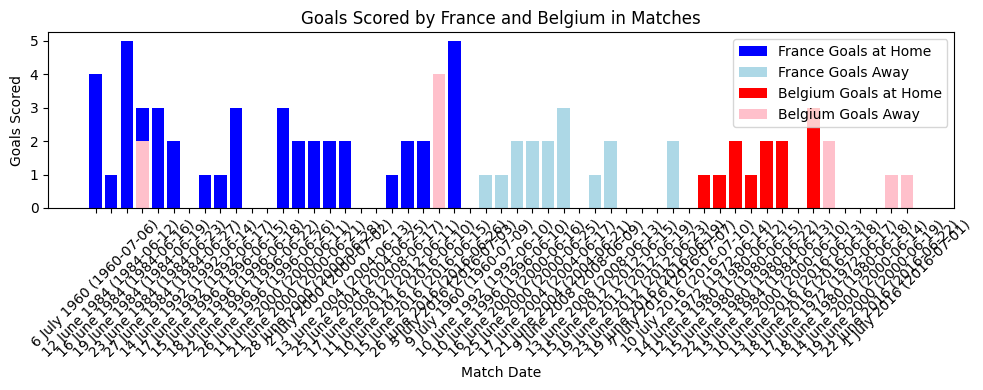

In [11]:
plot_goals_scored('France','Belgium')